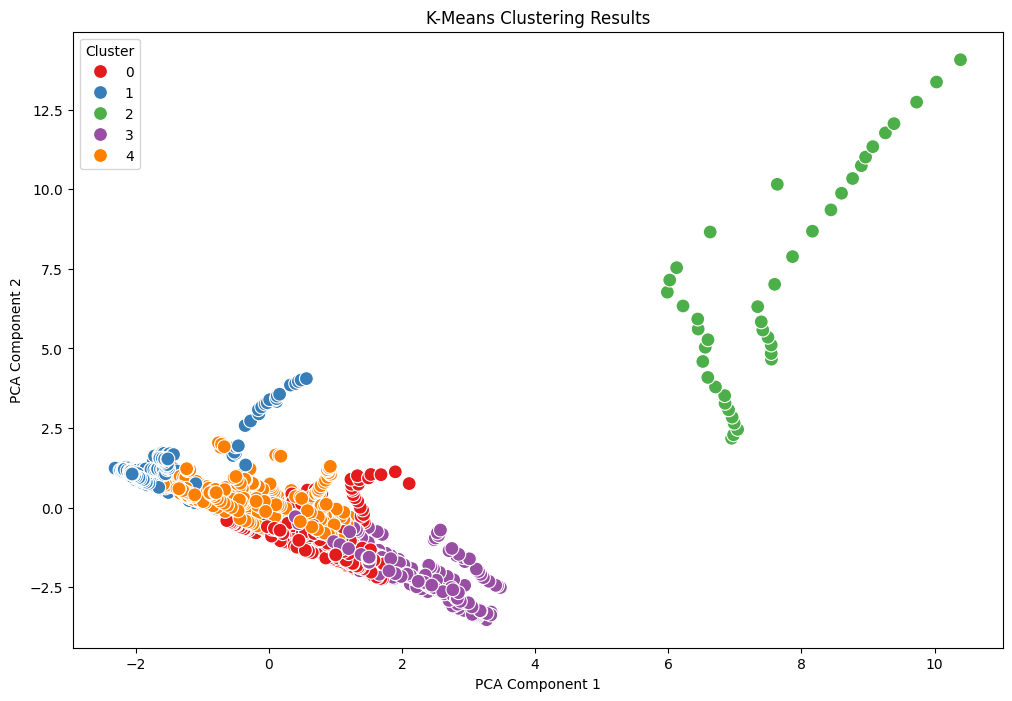

               BCG       Hib3       DTP3  Saneamento Seguro (%)  \
cluster                                                           
0        85.918977  85.309168  88.669510              34.032513   
1         1.858974  90.856838  94.299145              86.051601   
2        90.047619  12.380952  84.928571              30.919547   
3        73.440000  18.480000  61.168000              15.709979   
4        95.878590  63.958225  94.460836              61.281481   

         Gini (Indice de Desigualdade no Pais)     Populacao  \
cluster                                                        
0                                    48.639659  3.083048e+07   
1                                    33.068376  3.341059e+07   
2                                    38.619048  1.291907e+09   
3                                    41.200000  3.357933e+07   
4                                    36.140992  3.007460e+07   

         Taxa de Extrema Pobreza (%)  Numero de Usuario de Internet  \
cluster   

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Carregar os dados
data = pd.read_csv('base_unificada_com_casos.csv')

# 2. Selecionar variáveis relevantes (ajuste conforme necessário)
# Aqui eu estou assumindo que você quer usar variáveis que possam estar relacionadas aos casos de infecções
variables_of_interest = [
    'BCG', 'Hib3', 'DTP3', 'Saneamento Seguro (%)', 'Gini (Indice de Desigualdade no Pais)',
    'Populacao', 'Taxa de Extrema Pobreza (%)', 'Numero de Usuario de Internet', 
    'Numero de Casos de Infeccoes Respiratorios e Tuberculose'
]
data_filtered = data[variables_of_interest]

# 3. Normalização dos dados
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_filtered)

# 4. Aplicar K-Means
kmeans = KMeans(n_clusters=5, random_state=42)  # Ajuste o número de clusters conforme necessário
data['cluster'] = kmeans.fit_predict(data_scaled)

# 5. Visualizar os resultados com PCA para redução de dimensionalidade
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', palette='Set1', data=data, s=100)
plt.title('K-Means Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# 6. Análise dos clusters
cluster_summary = data.groupby('cluster')[variables_of_interest].mean()
print(cluster_summary)
